In [11]:
%load_ext autoreload
%autoreload 2

import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from omegaconf import OmegaConf

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.datasets import IamDataset
from text_recognizer.datasets import IamParagraphsDataset
from text_recognizer.models import SegmentationModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
path = "../training/experiments/SegmentationModel_IamParagraphsDataset_UNet/1207_082955/config.yml"

In [6]:
config = OmegaConf.load(path)

In [ ]:
model = SegmentationModel("UNet", 
                          "IamParagraphsDataset", 
                          network_args=config.network.args, 
                          dataset_args=config.dataset.args)
model.load_weights()

In [9]:
paragraphs_dataset = IamParagraphsDataset(False, **config.dataset.args)
paragraphs_dataset.load_or_generate_data()
print(paragraphs_dataset)

2020-12-07 20:38:30.094 | INFO     | text_recognizer.datasets.iam_paragraphs_dataset:_load_iam_paragraphs:250 - Loading IAM paragraph crops and ground truth from image files...


IAM Paragraph Dataset
Num classes: 3
Data: (308, 256, 256)
Targets: (308, 256, 256)



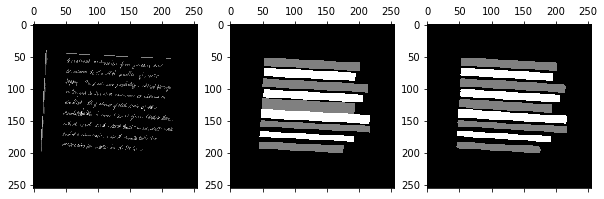

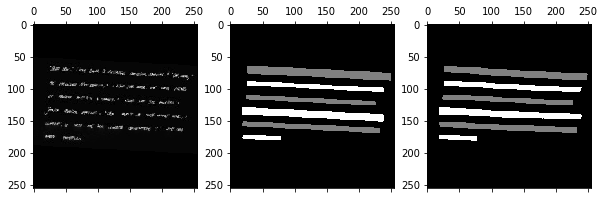

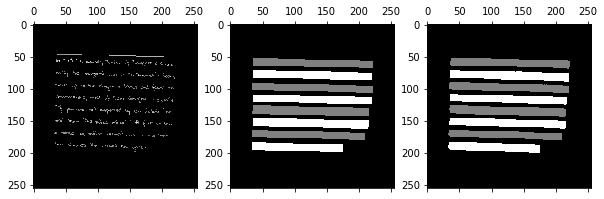

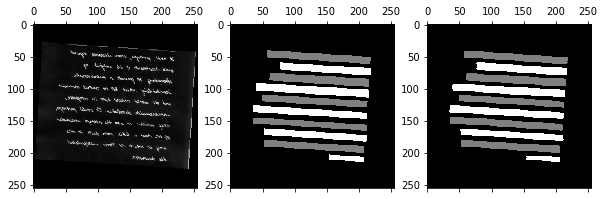

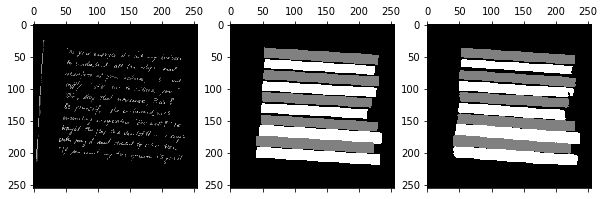

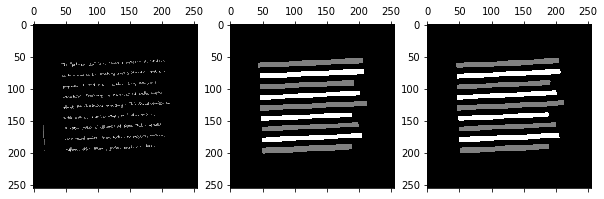

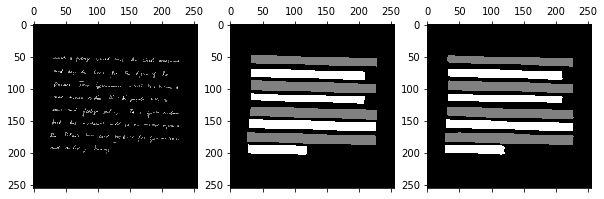

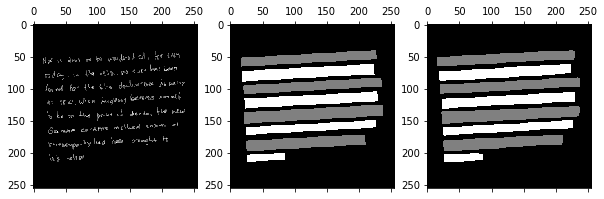

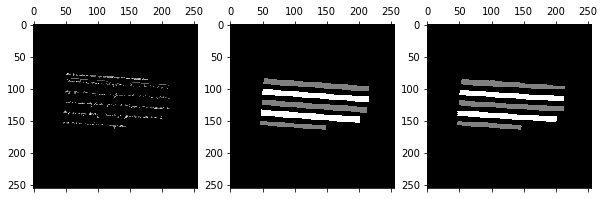

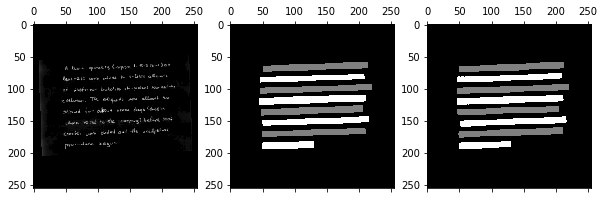

In [39]:
for ind in range(10):
    x, y = paragraphs_dataset[ind]
    y_hat = model.predict_on_image(x).cpu().numpy()
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(131)
    ax1.matshow(x.squeeze(0), cmap='gray')
    ax2 = fig.add_subplot(132)
    ax2.matshow(y.squeeze(0), cmap='gray')
    ax3 = fig.add_subplot(133)
    ax3.matshow(y_hat.squeeze(0), cmap='gray')